In [150]:
M = 100
N = 50

In [151]:
total = 0.0
for i in range(int(M/2), int(2*M)+1):
    total+= (1/(i+1))
c = 1/total

In [152]:
c

0.7226473980733251

In [153]:
def f(u):
    return 8*u

In [154]:
def F(u):
    ans = 0.0
    for i in range(int(M/2), int(2*M)+1):
        if i < u:
            ans += f(i)*c*(1/(i+1))
        if i >= u:
            ans += f(u)*c*(1/(i+1))
    return ans

In [155]:
def h(u):
    return u

In [156]:
def o(u):
    if u == 0:
        return 0
    if u > 0:
        return 2*u + 4

In [157]:
def r_t(s_t, a_t):
    return F(a_t + s_t) - h(a_t + s_t) - o(a_t)

In [158]:
def r_N(s_t):
    return 0

In [159]:
dp = [[{'u*(s_t)':0.0, 'a*(s_t)':-1} for i in range(0, M+1)] for j in range(0, N+1)]

In [160]:
dp[50][1]

{'u*(s_t)': 0.0, 'a*(s_t)': -1}

In [161]:
for t in range(N-1, 0, -1):
    for s_t in range(0, M+1):
        a_star_s_t = -1
        max_val = 0.0
        for a_t in range(0, M+1-s_t):
            temp_value = float(r_t(s_t, a_t))
            for d_t in range(int(M/2), int(2*M) + 1):
                temp_value += dp[t+1][max(0, s_t + a_t - d_t)]['u*(s_t)']*c*(1/(d_t + 1))
            if temp_value > max_val:
                max_val = temp_value
                a_star_s_t = a_t
        dp[t][s_t]['u*(s_t)'] = max_val
        dp[t][s_t]['a*(s_t)'] = a_star_s_t

In [162]:
x = [i for i in range(0, M+1)]

In [163]:
y = [dp[1][i]['a*(s_t)'] for i in range(0, M+1)]

In [164]:
from pylab import mpl, plt
plt.style.use(plt.style.available[11])
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Text(0, 0.5, 'stock to order')

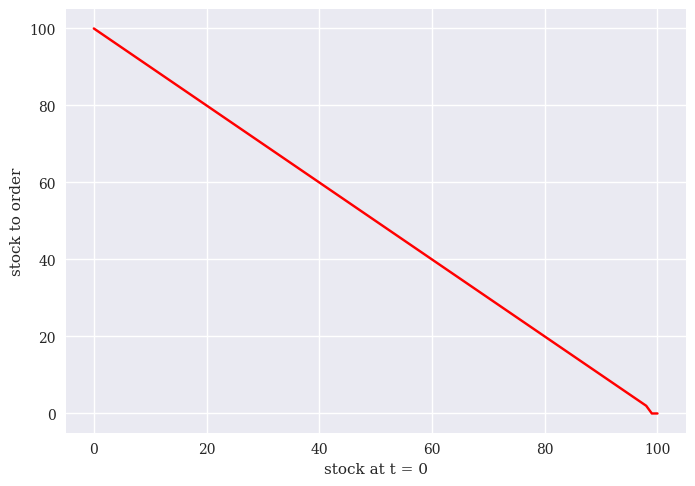

In [165]:
x = [i for i in range(0, M+1)]
y = [dp[1][i]['a*(s_t)'] for i in range(0, M+1)]
plt.plot(x, y, color='r')
plt.xlabel('stock at t = 0')
plt.ylabel('stock to order')

Text(0, 0.5, 'stock to order')

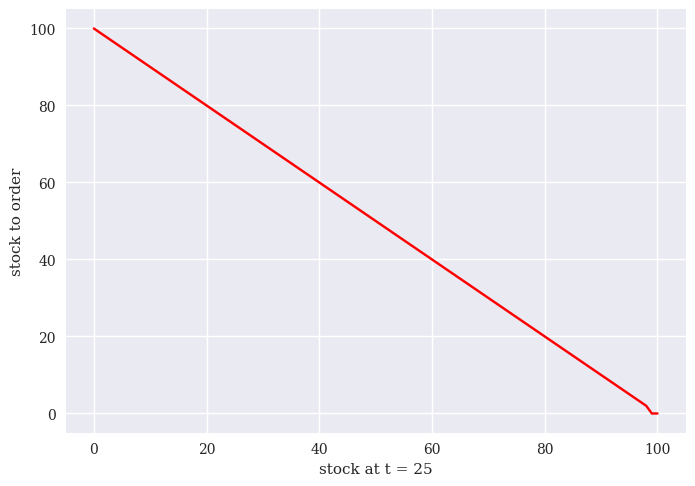

In [166]:
x = [i for i in range(0, M+1)]
y = [dp[25][i]['a*(s_t)'] for i in range(0, M+1)]
plt.plot(x, y, color='r')
plt.xlabel('stock at t = 25')
plt.ylabel('stock to order')

Text(0, 0.5, 'stock to order')

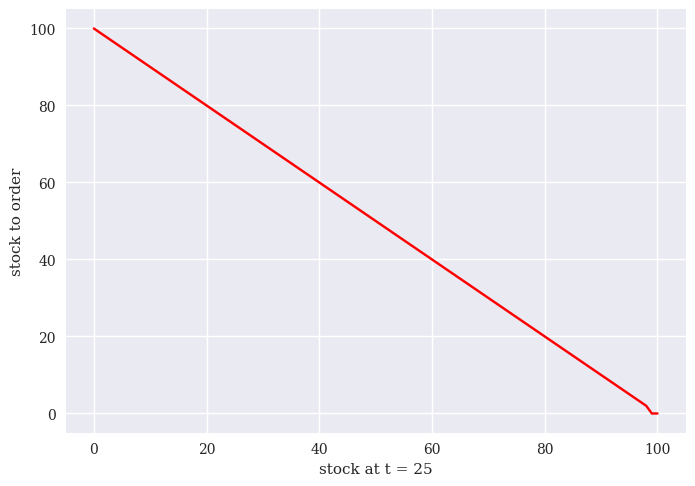

In [170]:
x = [i for i in range(0, M+1)]
y = [dp[40][i]['a*(s_t)'] for i in range(0, M+1)]
plt.plot(x, y, color='r')
plt.xlabel('stock at t = 25')
plt.ylabel('stock to order')